linear:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


poly:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


rbf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13


c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

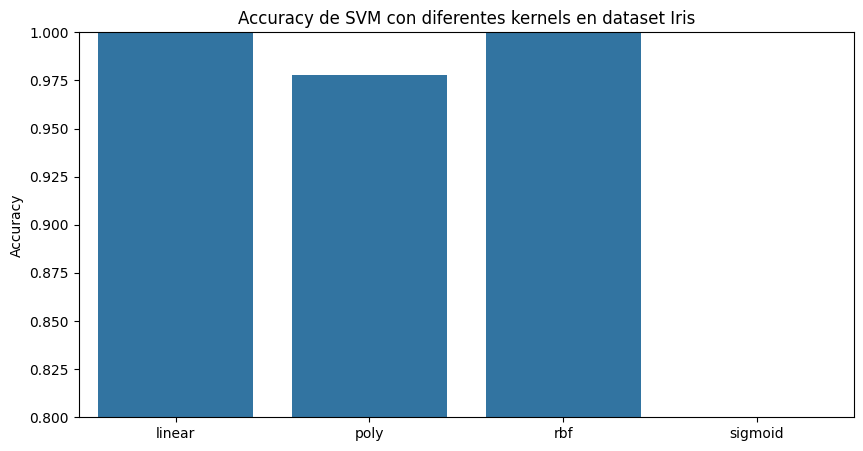

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    
    print(f"{kernel}:\n{classification_report(y_test, y_pred)}\n")

plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Accuracy de SVM con diferentes kernels en dataset Iris')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

linear:
MSE: 5324.58
R2: 0.01

poly:
MSE: 4046.78
R2: 0.25

rbf:
MSE: 4525.81
R2: 0.16



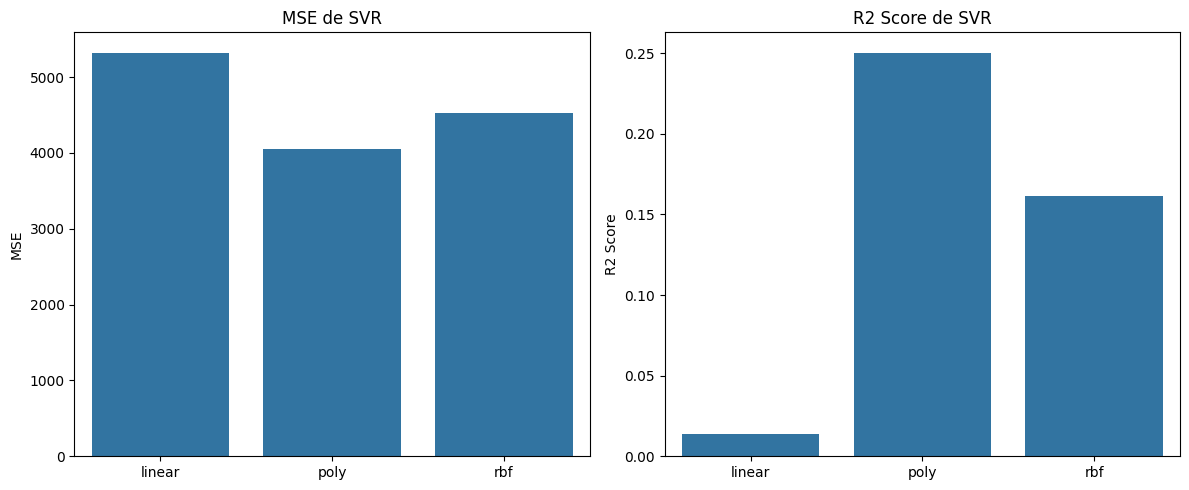

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
results_reg = {}

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    
    y_pred = svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_reg[kernel] = {'MSE': mse, 'R2': r2}
    
    print(f"{kernel}:\nMSE: {mse:.2f}\nR2: {r2:.2f}\n")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(results_reg.keys()), y=[v['MSE'] for v in results_reg.values()])
plt.title('MSE de SVR')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
sns.barplot(x=list(results_reg.keys()), y=[v['R2'] for v in results_reg.values()])
plt.title('R2 Score de SVR')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('svm_rbf', svm_rbf),
        ('svm_linear', svm_linear),
        ('log_reg', log_reg),
        ('dt', dt)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Voting Classifier Accuracy:", acc)
print(classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.022556390977443608
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         0
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         2
        49.0       0.00      0.00      0.00         0
        50.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         0
        58.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         2
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.0

c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.antonio.edre\Documents\main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca